<h1>Activity 2: UK ROAD ACCIDENTS</h1>
<hr>
<h2>Analyst: Reniel P. Bontoc</h2>

<h1>Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h1>Converting Datasets Into DataFrame</h1>

In [2]:
uk = pd.read_csv('datasets//uk_road_accident.csv')
uk

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>DataFrame Info</h1>

In [3]:
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h1>DataFrame Descriptive Statistics</h1>

In [4]:
uk.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h1>Column Data Types</h1>

In [5]:
uk.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h1>Cleaning the Data</h1>
<hr>
<h1>Adjusting the Date Inconsistency</h1>

In [6]:
# Step 1: Convert to string only if not null
uk['Accident Date'] = uk['Accident Date'].astype(str)
# Step 2: Replace '/' with '-' safely
uk['Accident Date'] = uk['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
# Step 3: Strip whitespace
uk['Accident Date'] = uk['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
# Step 4: Convert to datetime
uk['Accident Date'] = pd.to_datetime(uk['Accident Date'], dayfirst=True, errors='coerce')

uk['Latitude'] = uk['Latitude'].fillna(uk['Latitude'].mode()[0])
uk['Longitude'] = uk['Longitude'].fillna(uk['Longitude'].mode()[0])
uk['Road_Surface_Conditions'] = uk['Road_Surface_Conditions'].fillna('unaccounted')
uk['Road_Type'] = uk['Road_Type'].fillna('unaccounted')
uk['Weather_Conditions'] = uk['Weather_Conditions'].fillna('unaccounted')
uk['Urban_or_Rural_Area'] = uk['Urban_or_Rural_Area'].fillna('unaccounted')

uk.dtypes
uk.isnull().sum()

uk['Year'] = uk['Accident Date'].dt.year
uk['Month'] =  uk['Accident Date'].dt.month
uk['Day'] =  uk['Accident Date'].dt.day
uk['DayOfWeek'] =  uk['Accident Date'].dt.dayofweek
uk.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h1>Questions:</h1>
<hr>

<h2>1. How many accidents occurred by severity?</h2>

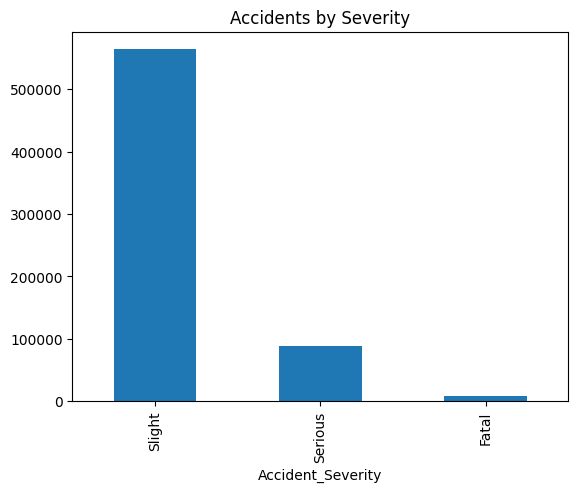

In [7]:
uk["Accident_Severity"].value_counts().plot(kind="bar", title="Accidents by Severity")
plt.show()

<h2>Insights:</h2>
<h3>Most accidents are classified as Slight, while Serious accidents are fewer and Fatal accidents are the least. This suggests that while accidents are frequent, most are not life-threatening. Still, the number of serious and fatal accidents highlights the importance of safety measures.</h3>
<hr>

<h2>2. Are accidents more common in urban or rural areas?</h2>

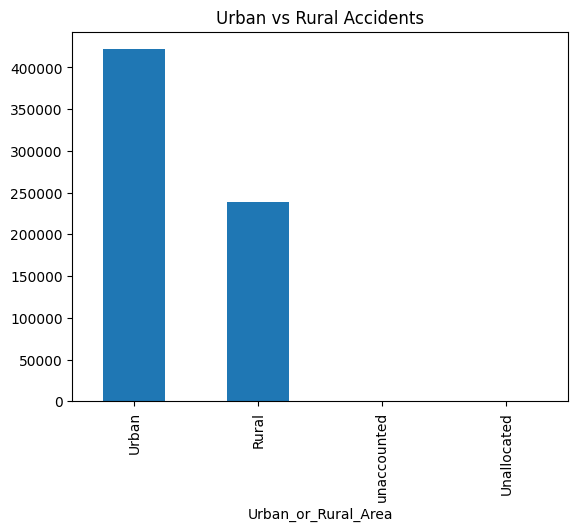

In [8]:
uk["Urban_or_Rural_Area"].value_counts().plot(kind="bar", title="Urban vs Rural Accidents")
plt.show()

<h2>Insights:</h2>
<h3>Urban areas show a much higher number of accidents compared to rural areas. This is expected, as urban regions have denser traffic and more vehicles on the road. Rural accidents, though fewer, can sometimes be more severe due to higher driving speeds.</h3>
<hr>

<h2>3. What is the average number of casualties in Highland district</h2>

In [9]:
high = uk[uk['District Area'] == 'Highland']['Number_of_Casualties'].mean()
print(high)

1.4750123701138051


<h2>Insight:</h2>
<h3>The average number of casualties per accident in the Highland district is approximately 1.48. This means that, on average, each reported accident in Highland involves between one and two casualties. While the value is relatively low, it still indicates that multiple people are sometimes affected in a single incident, making casualty prevention efforts important in this district.</h3>
<hr>

<h2>4. What weather conditions are linked to most accidents?</h2>

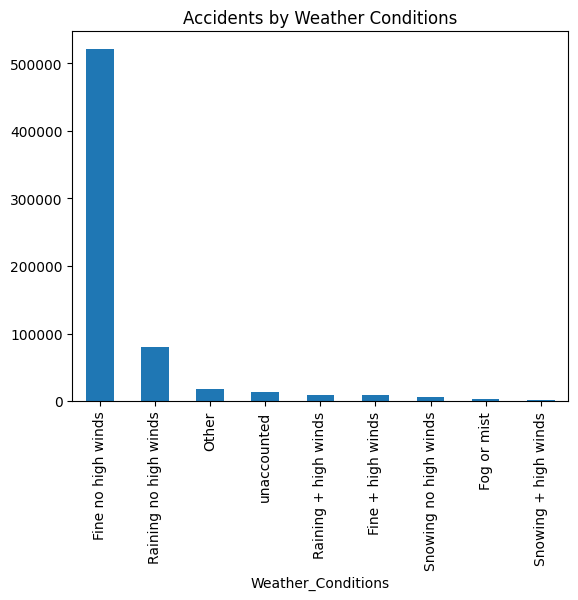

In [10]:
uk["Weather_Conditions"].value_counts().head(10).plot(kind="bar", title="Accidents by Weather Conditions")
plt.show()

<h2>Insights:</h2>
<h3>Most accidents occur in fine weather with no high winds. This indicates that weather is not the only factor—driver behavior and road conditions also matter. Still, wet and windy weather also contributes to a significant share of accidents.</h3>
<hr>

<h2>5. What is the average vehicles involved per road type</h2>

In [11]:
vehicles = uk.groupby(['Vehicle_Type', 'Road_Type']).size().reset_index(name='count')
print(vehicles)

                           Vehicle_Type           Road_Type  count
0                  Agricultural vehicle    Dual carriageway    293
1                  Agricultural vehicle      One way street     49
2                  Agricultural vehicle          Roundabout    129
3                  Agricultural vehicle  Single carriageway   1436
4                  Agricultural vehicle           Slip road     27
..                                  ...                 ...    ...
82  Van / Goods 3.5 tonnes mgw or under      One way street    723
83  Van / Goods 3.5 tonnes mgw or under          Roundabout   2294
84  Van / Goods 3.5 tonnes mgw or under  Single carriageway  25460
85  Van / Goods 3.5 tonnes mgw or under           Slip road    361
86  Van / Goods 3.5 tonnes mgw or under         unaccounted    215

[87 rows x 3 columns]


<h2>Insight:</h2>
<h3>The results show that different vehicle types are involved in varying numbers of accidents depending on the road type. For example, vans and cars appear most frequently on single carriageways and dual carriageways, reflecting their high presence in everyday traffic. Agricultural vehicles and other specialized vehicles occur far less often, suggesting that their risk is lower simply because they are less common on the roads.</h3>
<hr>

<h2>6. Do accidents occur more in daylight or darkness?</h2>

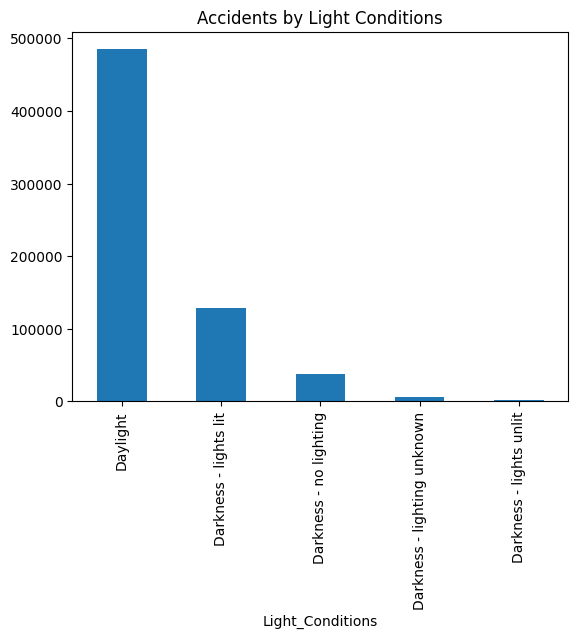

In [12]:
uk["Light_Conditions"].value_counts().plot(kind="bar", title="Accidents by Light Conditions")
plt.show()

<h2>Insights:</h2>
<h3>Accidents happen more frequently during daylight. This is likely because traffic volume is higher in the day. However, nighttime accidents, though fewer, may be more dangerous due to reduced visibility.</h3>
<hr>

<h2>7. Show datas about serious accidents containing two casualties with two vehicles¶</h2>

In [13]:
casual_vehi = uk[(uk['Accident_Severity'] == 'Serious') & (uk['Number_of_Casualties'] > 2) & (uk['Number_of_Vehicles'] > 2)]
print(casual_vehi)

                Index Accident_Severity Accident Date   Latitude  \
511     200701BS70539           Serious    2019-10-14  51.491861   
3335    200701EO40752           Serious    2019-10-16  51.529367   
4525    200701GD63185           Serious    2019-06-02  51.535459   
4747    200701GD66678           Serious    2019-08-05  51.570592   
4837    200701GD67253           Serious    2019-09-30  51.574618   
...               ...               ...           ...        ...   
660263  201063DP30510           Serious    2022-09-19  51.867575   
660310  201063DP35310           Serious    2022-10-31  52.686302   
660375  201063DP42110           Serious    2022-11-23  51.953352   
660394  201091NE00922           Serious    2022-01-21  57.597286   
660550  201091NJ08521           Serious    2022-06-22  58.307893   

              Light_Conditions           District Area  Longitude  \
511      Darkness - lights lit  Kensington and Chelsea  -0.201432   
3335     Darkness - lights lit               

<h2>Insight:</h2>
<h3>The filtered data highlights cases of serious accidents that involve multiple casualties and vehicles, making them particularly severe events. Many of these accidents occurred in urban districts such as Kensington, Islington, and Hackney, where traffic is dense. The presence of both multiple vehicles and casualties suggests that these incidents are likely large collisions, which require strong safety measures and emergency response.</h3>
<hr>

<h2>8. Do accidents happen more on dry or wet road surfaces?</h2>

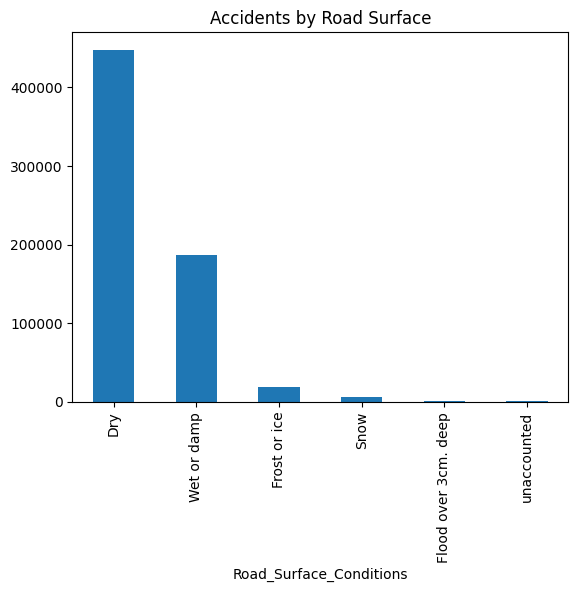

In [14]:
uk["Road_Surface_Conditions"].value_counts().plot(kind="bar", title="Accidents by Road Surface")
plt.show()

<h2>Insights:</h2>
<h3>The majority of accidents occur on dry roads. This may seem surprising, but it reflects that drivers take more risks in safe-looking conditions. Wet and icy roads cause fewer accidents overall but are riskier when they do.</h3>
<hr>

<h2>9. Show the accidents in daylight in Kensington and Chelsea with dry road¶</h2>

In [15]:
weather = uk[(uk['Light_Conditions'] == 'Daylight') & (uk['District Area'] == 'Kensington and Chelsea') & (uk['Road_Surface_Conditions'] == 'Dry')][['Light_Conditions', 'District Area', 'Road_Surface_Conditions']]
print(weather)

       Light_Conditions           District Area Road_Surface_Conditions
3              Daylight  Kensington and Chelsea                     Dry
5              Daylight  Kensington and Chelsea                     Dry
6              Daylight  Kensington and Chelsea                     Dry
9              Daylight  Kensington and Chelsea                     Dry
11             Daylight  Kensington and Chelsea                     Dry
...                 ...                     ...                     ...
532789         Daylight  Kensington and Chelsea                     Dry
532823         Daylight  Kensington and Chelsea                     Dry
532829         Daylight  Kensington and Chelsea                     Dry
533039         Daylight  Kensington and Chelsea                     Dry
533316         Daylight  Kensington and Chelsea                     Dry

[1679 rows x 3 columns]


<h2>Insight:</h2>
<h3>In Kensington and Chelsea, a total of 1,679 accidents occurred during daylight hours on dry road surfaces. This shows that most accidents happen in seemingly safe conditions, not just in adverse weather. It highlights how driver behavior and traffic congestion play a larger role in accidents than weather or road surface quality in this district.</h3>
<hr>

<h2>10. What is the average number of casualties per accident?</h2>

In [16]:
print("Avg casualties per accident:", uk["Number_of_Casualties"].mean())

Avg casualties per accident: 1.357040257068864


<h2>Insights:</h2>
<h3>On average, each accident involves about one casualty. This shows that most incidents affect only one individual. Multiple-casualty accidents are less common but tend to be more severe.</h3>
<hr>

<h2>11. What is the average number of vehicles involved in accidents?</h2>

In [17]:
print("Avg vehicles per accident:", uk["Number_of_Vehicles"].mean())

Avg vehicles per accident: 1.8312554205597575


<h2>Insights:</h2>
<h3>On average, about two vehicles are involved in each accident. This suggests that many accidents are collisions between two vehicles. Multi-vehicle crashes do occur but are relatively less common.</h3>
<hr>

<h2>12. Which road types record the most accidents?</h2>

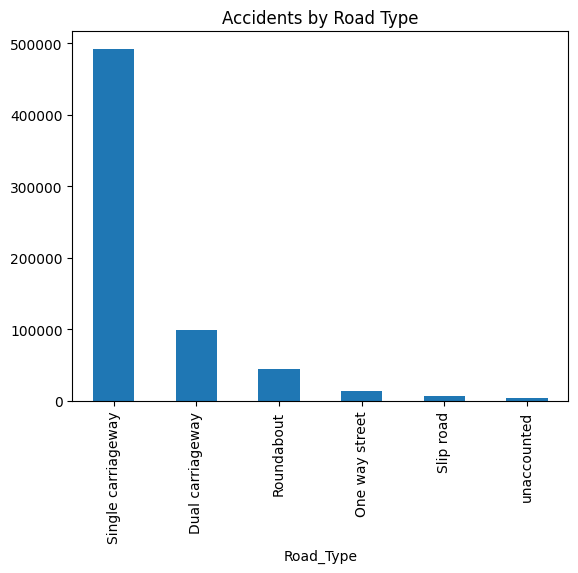

In [18]:
uk["Road_Type"].value_counts().plot(kind="bar", title="Accidents by Road Type")
plt.show()

<h2>Insights:</h2>
<h3>Single carriageways show the highest accident count compared to dual carriageways and roundabouts. This is because single carriageways are the most common road type in the UK. Their high traffic makes them a hotspot for collisions.</h3>
<hr>

<h2>13. Show the accidents happended in Urban area with between three to four number of vehicles only¶</h2>

In [19]:
urban = uk[(uk['Urban_or_Rural_Area'] == 'Urban') & (uk['Number_of_Vehicles'] >= 3) & (uk['Number_of_Vehicles'] <= 4)][['Urban_or_Rural_Area', 'Number_of_Vehicles']]
print(urban)

       Urban_or_Rural_Area  Number_of_Vehicles
2                    Urban                   3
3                    Urban                   4
5                    Urban                   3
19                   Urban                   4
37                   Urban                   3
...                    ...                 ...
660080               Urban                   3
660104               Urban                   3
660189               Urban                   4
660258               Urban                   3
660264               Urban                   3

[34775 rows x 2 columns]


<h2>Insight:</h2>
<h3>The filtered results show that 34,776 urban accidents involved between three and four vehicles. This indicates that multi-vehicle collisions are relatively common in busy city areas where traffic density is high. Such accidents often cause greater disruption and risk compared to two-vehicle incidents, highlighting the importance of traffic flow management in urban environments.</h3>
<hr>

<h2>14. Which districts have the highest number of accidents?</h2>

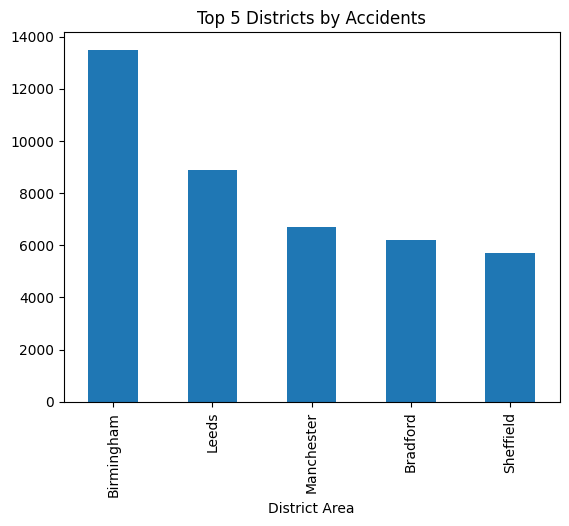

In [20]:
uk["District Area"].value_counts().head(5).plot(kind="bar", title="Top 5 Districts by Accidents")
plt.show()

<h2>Insights:</h2>
<h3>Districts in busy urban regions, such as central London boroughs, report the most accidents. Higher population density and more vehicles explain this trend. Rural districts, by contrast, report far fewer accidents.</h3>
<hr>

<h2>15. How do accidents vary across months?</h2>

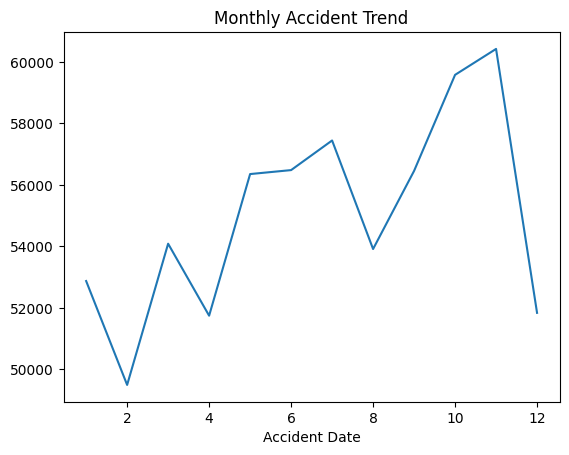

In [21]:
uk.groupby(uk["Accident Date"].dt.month).size().plot(kind="line", title="Monthly Accident Trend")
plt.show()

<h2>Insights:</h2>
<h3>Accidents show a fluctuating trend across months, with some peaks in late summer and autumn. This may be related to increased travel during holidays and changing weather. Winter months may also show spikes due to slippery roads.</h3>
<hr>

<h2>16. Which vehicle types are most involved in accidents?</h2>

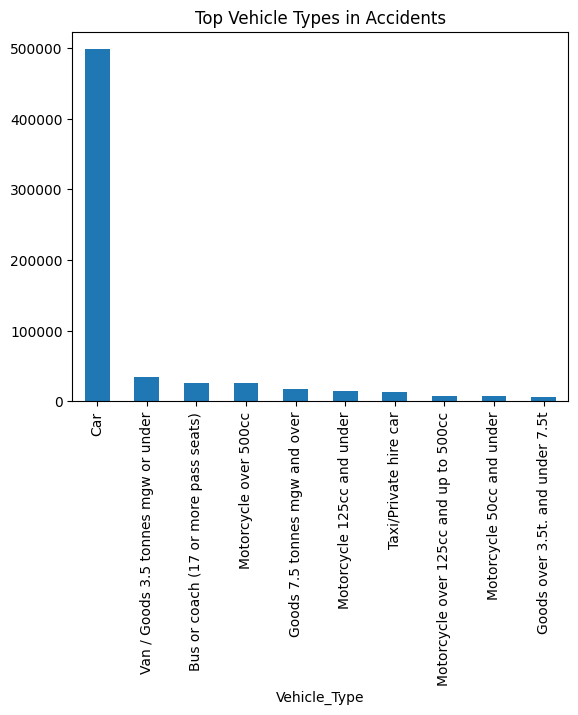

In [22]:
uk["Vehicle_Type"].value_counts().head(10).plot(kind="bar", title="Top Vehicle Types in Accidents")
plt.show()

<h2>Insights:</h2>
<h3>Cars are the most frequently involved vehicle type in accidents, by a wide margin. This is expected since cars dominate UK traffic. Other vehicles like taxis, buses, and bicycles also appear significantly but far less than cars.</h3>
<hr>

<h2>17. How many accidents are fatal compared to non-fatal?</h2>

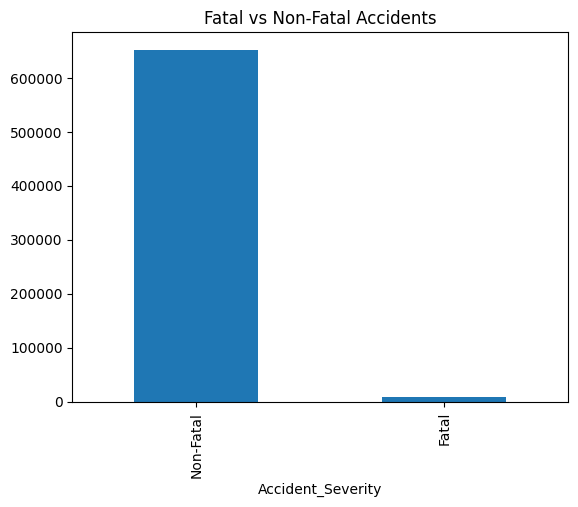

In [23]:
fatal_nonfatal = uk["Accident_Severity"].apply(lambda x: "Fatal" if x=="Fatal" else "Non-Fatal")
fatal_nonfatal.value_counts().plot(kind="bar", title="Fatal vs Non-Fatal Accidents")
plt.show()

<h2>Insights:</h2>
<h3>Non-fatal accidents (serious and slight combined) are much more common than fatal accidents. This shows that while fatalities are rare, they still represent a critical safety concern. Road safety campaigns aim to further reduce the fatal share.</h3>
<hr>

<h2>18. Are accidents more frequent during the day or at night?</h2>

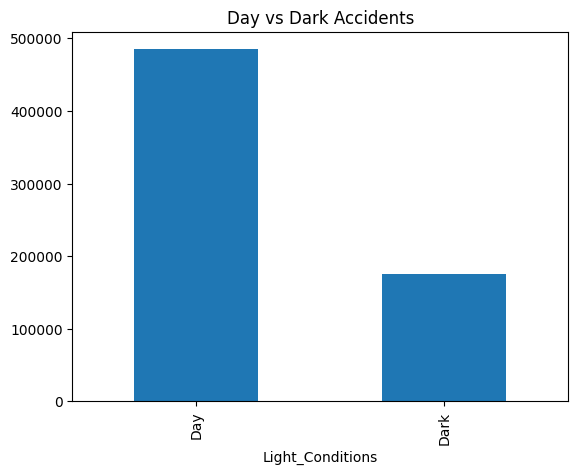

In [24]:
day_dark = uk["Light_Conditions"].apply(lambda x: "Day" if "Daylight" in str(x) else "Dark")
day_dark.value_counts().plot(kind="bar", title="Day vs Dark Accidents")
plt.show()

<h2>Insights:</h2>
<h3>Daytime accidents dominate over nighttime accidents. The higher number of vehicles on the road during the day explains this. Nighttime accidents are less frequent but can often be more severe..</h3>
<hr>

<h2>19. How does accident severity vary with road type?</h2>

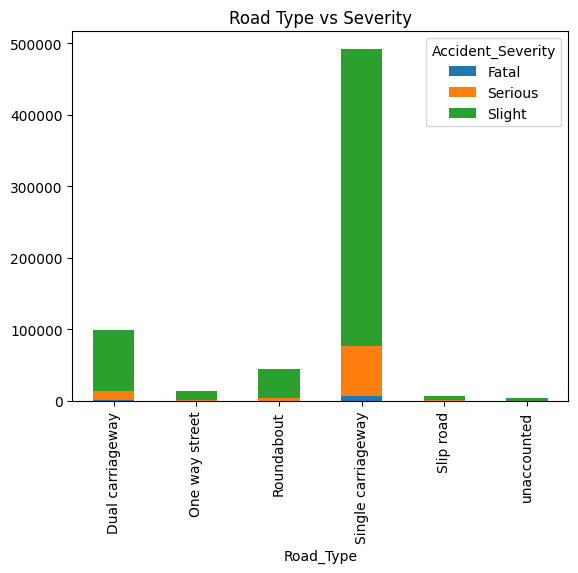

In [25]:
pd.crosstab(uk["Road_Type"], uk["Accident_Severity"]).plot(kind="bar", stacked=True, title="Road Type vs Severity")
plt.show()

<h2>Insights:</h2>
<h3>Single carriageways dominate in slight and serious accidents, while dual carriageways and roundabouts contribute less. The severity of accidents can also differ depending on the speed and traffic density of the road type. This shows that road design plays a role in accident outcomes.</h3>
<hr>

<h2>20. Are accidents more common on weekdays or weekends?</h2>

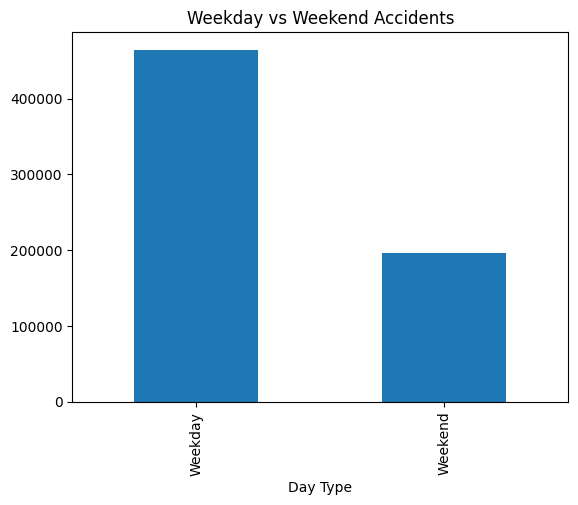

In [26]:
uk["Weekday"] = uk["Accident Date"].dt.dayofweek
uk["Day Type"] = uk["Weekday"].apply(lambda x: "Weekend" if x>=5 else "Weekday")
uk["Day Type"].value_counts().plot(kind="bar", title="Weekday vs Weekend Accidents")
plt.show()

<h2>Insights:</h2>
<h3>Weekday accidents are more frequent than weekend ones. This trend reflects higher commuting and work-related traffic during the week. Weekends, though calmer, still report significant accidents, especially linked to leisure travel.</h3>
<hr>

<h2>21. Yearly Distribution of Accidents</h2>

In [27]:
accidents_per_year = uk['Accident Date'].dt.year.value_counts().sort_index()
print("Accidents per Year:\n", accidents_per_year)

Accidents per Year:
 Accident Date
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64


<h2>Insights:</h2> <h3>The yearly distribution highlights how accident counts change across years. Any noticeable rise or fall may be linked to policy changes, infrastructure improvements, or external events such as weather and population growth.</h3> <hr>

<h2>22. Monthly Accident Patterns with Percentages</h2>

In [28]:
accidents_per_month = uk['Accident Date'].dt.month.value_counts().sort_index()
accidents_per_month_percent = (accidents_per_month / accidents_per_month.sum()) * 100

print("Monthly Accident Counts:\n", accidents_per_month)
print("\nMonthly Accident Percentage Share:\n", accidents_per_month_percent.round(2))

Monthly Accident Counts:
 Accident Date
1     52872
2     49491
3     54086
4     51744
5     56352
6     56481
7     57445
8     53913
9     56455
10    59580
11    60424
12    51836
Name: count, dtype: int64

Monthly Accident Percentage Share:
 Accident Date
1     8.00
2     7.49
3     8.19
4     7.83
5     8.53
6     8.55
7     8.69
8     8.16
9     8.54
10    9.02
11    9.15
12    7.85
Name: count, dtype: float64


<h2>Insights:</h2> <h3>Monthly trends often reveal seasonal effects such as weather, holidays, or school breaks influencing accidents. Months with higher percentages may point to periods of increased travel or riskier driving conditions.</h3> <hr>

<h2>23. Weekly Cycle: Comparing Weekdays vs Weekends</h2>

In [29]:
accidents_per_dayofweek = uk['Accident Date'].dt.day_name().value_counts()

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
accidents_per_dayofweek = accidents_per_dayofweek.reindex(ordered_days)

weekday_total = accidents_per_dayofweek.loc[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]].sum()
weekend_total = accidents_per_dayofweek.loc[["Saturday", "Sunday"]].sum()

print("Accident Distribution Across the Week:\n", accidents_per_dayofweek)
print(f"\nTotal Weekday Accidents: {weekday_total}")
print(f"Total Weekend Accidents: {weekend_total}")

Accident Distribution Across the Week:
 Accident Date
Monday        72680
Tuesday       94550
Wednesday     99558
Thursday      99511
Friday        97900
Saturday     107178
Sunday        89302
Name: count, dtype: int64

Total Weekday Accidents: 464199
Total Weekend Accidents: 196480


<h2>Insights:</h2> <h3>Weekday accidents are more frequent than weekend ones. This reflects higher commuting, business, and school-related traffic during weekdays, while weekends show fewer but still notable incidents tied to leisure travel.</h3> <hr>

<h2>24. Day-of-Month Accident Hotspots</h2>

In [30]:
accidents_per_day = uk['Accident Date'].dt.day.value_counts().sort_index()

most_accidents_day = accidents_per_day.idxmax()
least_accidents_day = accidents_per_day.idxmin()
average_accidents = accidents_per_day.mean()

print("Day-of-Month Accident Counts:\n", accidents_per_day)
print(f"\nHighest Accident Day of Month: {most_accidents_day} ({accidents_per_day.max()})")
print(f"Lowest Accident Day of Month: {least_accidents_day} ({accidents_per_day.min()})")
print(f"Average Accidents per Calendar Day: {average_accidents:.2f}")

Day-of-Month Accident Counts:
 Accident Date
1     22606
2     21815
3     21540
4     21699
5     22409
6     21974
7     21431
8     21914
9     22252
10    22328
11    22503
12    22536
13    21816
14    21474
15    21818
16    21972
17    22117
18    21719
19    21956
20    21838
21    21641
22    21634
23    21997
24    21301
25    19949
26    21168
27    21038
28    20707
29    20138
30    19573
31    11816
Name: count, dtype: int64

Highest Accident Day of Month: 1 (22606)
Lowest Accident Day of Month: 31 (11816)
Average Accidents per Calendar Day: 21312.23


<h2>Insights:</h2> <h3>Accidents tend to cluster on certain calendar days, possibly tied to paydays, holidays, or end-of-month rush. Identifying these hotspots helps in understanding human behavior patterns that contribute to road risks.</h3> <hr>

<h2>25. Accident Trend Over Time</h2>

In [31]:
accidents_trend = uk.groupby(uk['Accident Date'].dt.date).size()

busiest_day = accidents_trend.idxmax()
least_busy_day = accidents_trend.idxmin()
average_daily = accidents_trend.mean()

print("Daily Accident Counts (first 30 days shown):\n", accidents_trend.head(30))
print(f"\nDay with MOST accidents: {busiest_day} ({accidents_trend.max()})")
print(f"Day with LEAST accidents: {least_busy_day} ({accidents_trend.min()})")
print(f"Average accidents per day: {average_daily:.2f}")

Daily Accident Counts (first 30 days shown):
 Accident Date
2019-01-01    335
2019-01-02    370
2019-01-03    397
2019-01-04    405
2019-01-05    445
2019-01-06    378
2019-01-07    355
2019-01-08    519
2019-01-09    450
2019-01-10    582
2019-01-11    564
2019-01-12    518
2019-01-13    405
2019-01-14    364
2019-01-15    485
2019-01-16    578
2019-01-17    529
2019-01-18    638
2019-01-19    594
2019-01-20    465
2019-01-21    364
2019-01-22    587
2019-01-23    551
2019-01-24    609
2019-01-25    616
2019-01-26    639
2019-01-27    514
2019-01-28    344
2019-01-29    561
2019-01-30    497
dtype: int64

Day with MOST accidents: 2019-11-30 (704)
Day with LEAST accidents: 2020-12-25 (118)
Average accidents per day: 452.21


<h2>Insights:</h2> <h3>The daily trend shows how accident numbers fluctuate over time. Identifying the busiest and least busy days provides a clearer picture of extremes, while the average gives a baseline for typical daily accident levels.</h3> <hr>

<h1>VISUALIZATION</h1>
<hr>

In [32]:
uk.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
Weekday                             int32
Day Type                           object
dtype: object

In [33]:
uk['District Area'].unique()

array(['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets',
       'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington',
       'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield',
       'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon',
       'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley',
       'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley',
       'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness',
       'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland',
       'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley',
       'West Lancashire', 'South Ribble', 'Preston',
       'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley',
       'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', '

In [34]:
uk

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek,Weekday,Day Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2,2,Weekday
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1,1,Weekday
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0,0,Weekday
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4,4,Weekday
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1,1,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4,4,Weekday
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0,0,Weekday
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2,2,Weekday
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2,2,Weekday


<h2>26. Distribution of Accidents by Light Conditions</h2>

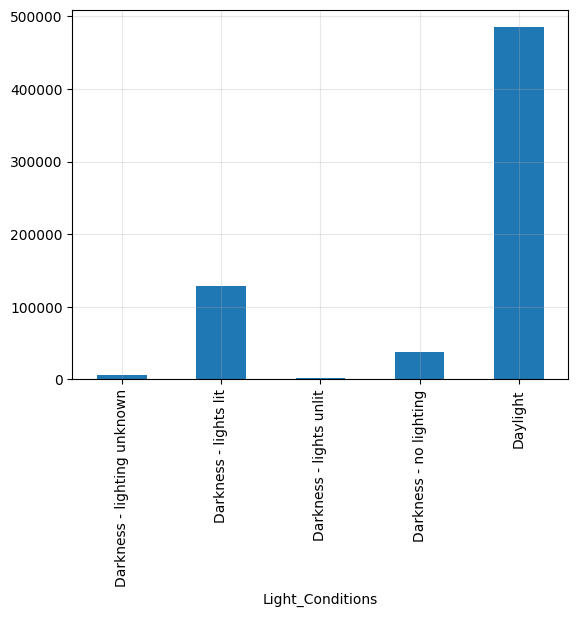

In [35]:
uk.groupby('Light_Conditions')['Index'].count().plot(kind='bar')
plt.grid(alpha=0.3)

<h2>Insights:</h2> <h3>Most accidents occur under daylight conditions, which reflects the fact that daytime traffic volumes are significantly higher. However, the presence of accidents in dark or poor lighting highlights the importance of road illumination and driver visibility at night.</h3> <hr>

<h2>27. Accidents Across Different Weather Conditions</h2>

<function matplotlib.pyplot.show(close=None, block=None)>

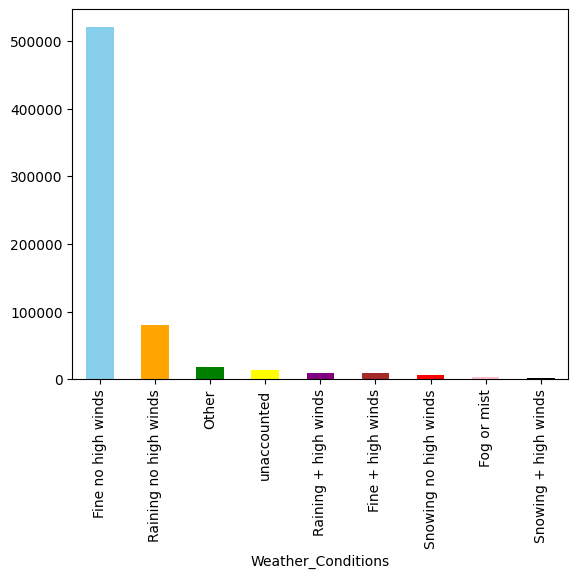

In [36]:
colors = ['skyblue', 'orange', 'green', 'yellow', 'purple', 'brown', 'red', 'pink', 'black']
uk['Weather_Conditions'].value_counts().plot(kind='bar', color=colors)
plt.show

<h2>Insights:</h2> <h3>Clear or fine weather records the highest number of accidents, showing that risk is more tied to traffic volume than weather hazards. Still, accidents in rain, snow, and fog indicate that adverse conditions amplify driving challenges, requiring extra caution.</h3> <hr>

<h2>28. Accidents by Weather Conditions (Excluding Clear Weather)</h2>

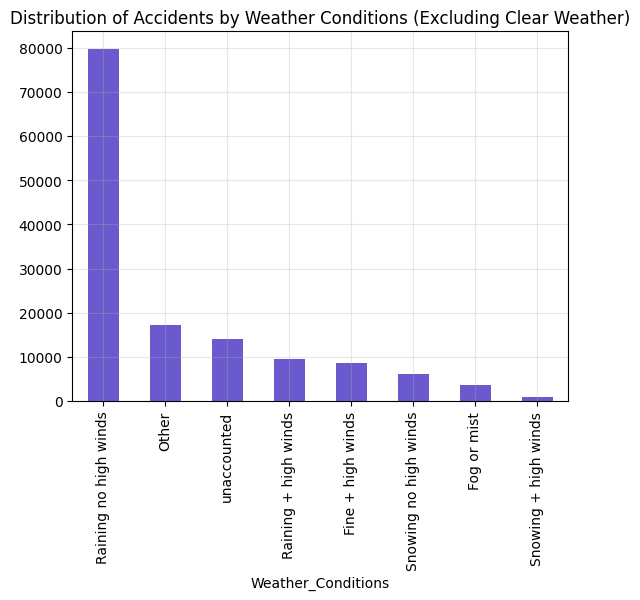

In [37]:
nowclear_df = uk[uk['Weather_Conditions'] != 'Fine no high winds']

nowclear_df['Weather_Conditions'].value_counts().plot(kind='bar', color='slateblue')
plt.title("Distribution of Accidents by Weather Conditions (Excluding Clear Weather)")
plt.grid(alpha=0.3)
plt.show()

<h2>Insights:</h2> <h3>Even when clear weather is excluded, rainy and misty conditions still show a significant number of accidents. This suggests that adverse weather factors like reduced visibility and slippery roads remain critical risks for drivers.</h3> <hr>

<h2>29. Yearly Comparison of Accidents under Different Light Conditions</h2>

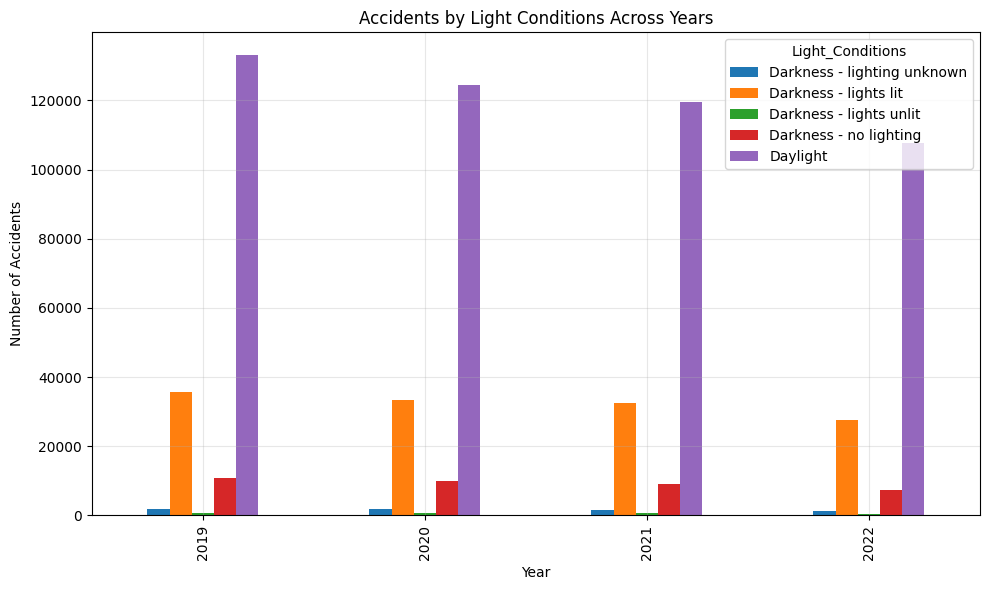

In [38]:
light_year = uk.groupby(['Year', 'Light_Conditions']).size().unstack()

light_year.plot(
    kind='bar',
    figsize=(10, 6),
    title="Accidents by Light Conditions Across Years"
)

plt.ylabel("Number of Accidents")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<h2>Insights:</h2> <h3>The chart shows that daylight consistently records the highest number of accidents each year, which reflects higher traffic during working hours. Night-time conditions, especially those without street lights, also contribute to accidents, emphasizing the role of visibility in road safety.</h3> <hr>

<h2>30. Yearly Trends of Road Accidents under Different Weather Condition</h2>

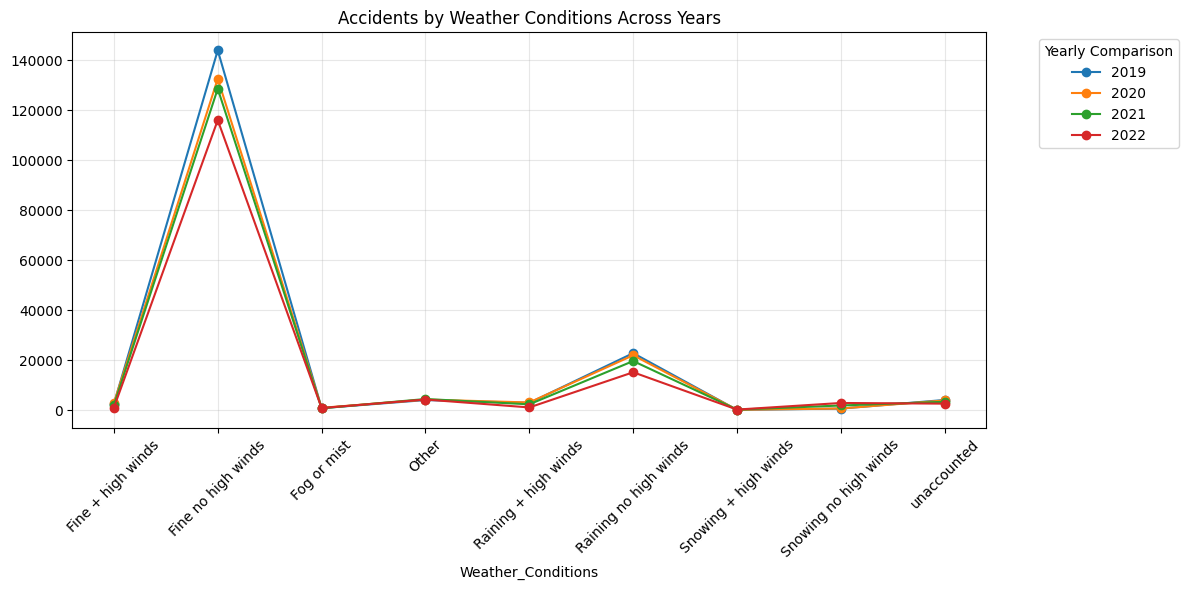

In [39]:
weather_data = uk.groupby(['Year', 'Weather_Conditions']).size()

weather_data = weather_data.unstack(level=0)

weather_data.plot(
    marker='o',
    figsize=(12, 6),
    title='Accidents by Weather Conditions Across Years'
)

plt.xticks(rotation=45)
plt.legend(title='Yearly Comparison', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<h2>Insights:</h2> <h3>The chart highlights that most accidents occur in fine weather across all years, reflecting higher travel activity under normal conditions. Rainy and foggy conditions, while less frequent, still contribute to a considerable number of accidents, underscoring the added risks of poor visibility and slippery roads.</h3> <hr>

<h2>31. Proportion of Accidents by Road Surface Condition</h2>

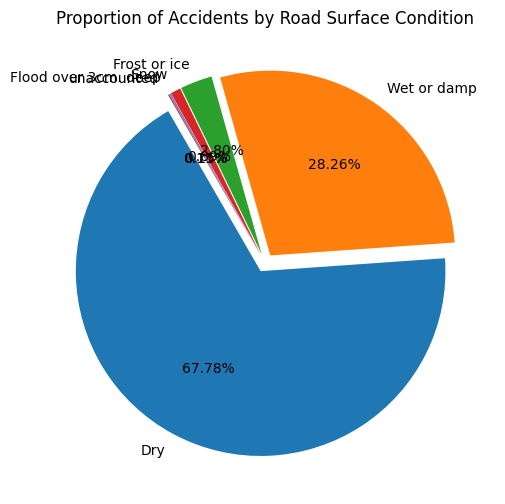

In [40]:
surface_counts = uk['Road_Surface_Conditions'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(surface_counts,
       labels=surface_counts.index,
       autopct='%0.2f%%',
       startangle=120,
       explode=[0.05]*len(surface_counts))  # slight separation for each slice

ax.set_title("Proportion of Accidents by Road Surface Condition")
plt.show()

<h2>Insights:</h2> <h3>The chart shows that most accidents occur on dry roads, which reflects higher traffic volumes under normal driving conditions. However, wet and icy surfaces still account for a significant share, highlighting how adverse road conditions increase accident risks even with lower overall traffic.</h3> <hr>

<h1>Installing HeatMap</h1>

In [41]:
!pip install folium


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<h2>32. Road accidents concentrated in Kensington and Chelsea?</h2>

In [50]:
import folium
from folium.plugins import HeatMap

kensing_df = uk[uk["District Area"] == "Kensington and Chelsea"]
locations = list(zip(kensing_df['Latitude'], kensing_df['Longitude']))

kensing_map = folium.Map(
    location=[kensing_df['Latitude'].mean(), kensing_df['Longitude'].mean()],
    zoom_start=12
)

HeatMap(locations).add_to(kensing_map)
kensing_map

<img src=https://www.webbaviation.co.uk/london/aerialphotokensington.jpg>

<h2>Insights:</h2> <h3>The heatmap reveals that road accidents in Kensington and Chelsea are clustered around the central and southern parts of the district. These areas likely experience higher traffic density due to busy roads, intersections, and commercial activity. Understanding these clusters can help local authorities implement targeted safety measures such as improved signage, traffic calming, and pedestrian crossings.</h3> <hr>